<a href="https://colab.research.google.com/github/karol10542/MachineLearning2021/blob/main/LAB_8_policy_evaluation_STARTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$ v(s)_\pi =  \sum \limits _{a} \pi(a|s) \sum \limits _{s'} \sum \limits _{r} p(s',r|s,a) [r+\gamma v_\pi(s')]$$

$$↓$$

$$ v(s)_{k+1} =  \sum \limits _{a} \pi(a|s) \sum \limits _{s'} \sum \limits _{r} p(s',r|s,a) [r+\gamma v_k(s')]$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #do wizualizacji danych

import gym

env = gym.make("FrozenLake-v0", is_slippery=True).env 
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [2]:
env.action_space

Discrete(4)

In [3]:
env.observation_space

Discrete(16)

In [4]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [6]:
n_states

16

In [7]:
states = list(range(env.observation_space.n))

In [8]:
states

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [10]:
actions = list(range(env.action_space.n))

In [11]:
actions

[0, 1, 2, 3]

In [12]:
def initialize_policy(n_states,n_actions):
  policy = np.zeros(shape=(n_states,n_actions)) + 1/n_actions
  return policy

In [13]:
policy = initialize_policy(n_states,n_actions)
policy

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

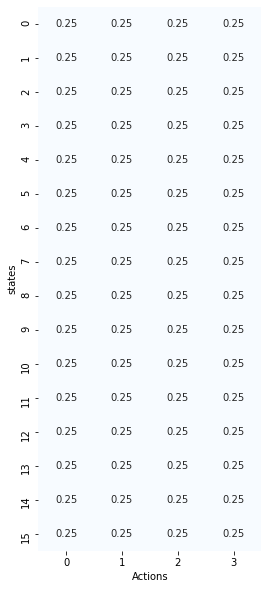

In [14]:
plt.figure(figsize=(4,10))
sns.heatmap(policy,cmap="Blues",annot=True,cbar=False)
plt.xlabel("Actions")
plt.ylabel("states")
plt.show()

In [15]:
V = np.zeros(n_states)

In [16]:
V

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
V.shape

(16,)

In [19]:
pi = policy
gamma = 1
theta = 0.0001


In [20]:
env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

In [22]:
env.P[0][1] #stan zerowy akcja pierwsza

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False),
 (0.3333333333333333, 1, 0.0, False)]

In [23]:
def bellman_update(env,V,pi,s,gamma):
  v = 0.

  for a in actions:
    for p, s_,r, done in env.P[s][a]:
      v +=pi[s][a] * p * (r + gamma * V[s_])

  
  V[s] = v


In [24]:
def evalutate_policy(env,V,pi, gamma,theta):
  delta = float("inf")
  
  while delta > theta:
    delta = 0
    for s in states:
      v = V[s]
      bellman_update(env,V,pi,s,gamma)
      delta = max(delta,abs(v - V[s]))

  return V

In [25]:
V = evalutate_policy(env,V,pi,gamma,theta)

In [26]:
V

array([0.01362153, 0.01144634, 0.02081586, 0.01037763, 0.01609442,
       0.        , 0.04070908, 0.        , 0.03473223, 0.0881362 ,
       0.1420284 , 0.        , 0.        , 0.17579915, 0.43927396,
       0.        ])

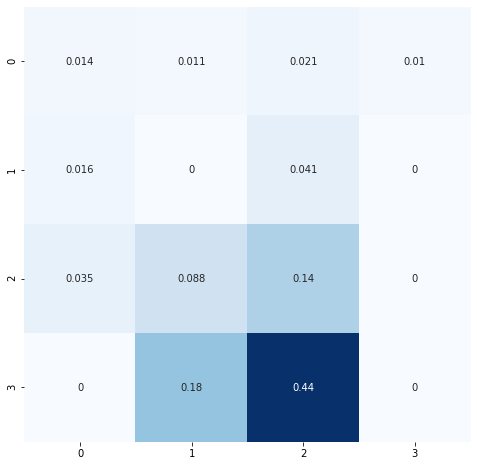

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(V.reshape(4,4),cmap="Blues",annot=True,cbar=False)

In [28]:
V.reshape(16,1)

array([[0.01362153],
       [0.01144634],
       [0.02081586],
       [0.01037763],
       [0.01609442],
       [0.        ],
       [0.04070908],
       [0.        ],
       [0.03473223],
       [0.0881362 ],
       [0.1420284 ],
       [0.        ],
       [0.        ],
       [0.17579915],
       [0.43927396],
       [0.        ]])

In [30]:
env.render()


SFFF
FHFH
FFFH
HFFG
